# AI Job Market Analysis using EDA

This project explores trends in AI-related job listings using Exploratory Data Analysis (EDA).  
We'll analyze job roles, companies, locations, salary patterns, and experience levels to gain insights into the AI job market.  
The goal is to help job seekers, HR teams, and data enthusiasts understand current hiring patterns in the AI industry.

1. Import Libraries
2. Load Dataset
3. Data Overview
4. Data Cleaning (if needed)
5. Univariate Analysis
6. Bivariate Analysis
7. Correlation Analysis
8. Key Insights

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Plot settings
plt.style.use('ggplot')
sns.set(style="whitegrid")
%matplotlib inline
# Load the dataset
df = pd.read_csv("../data/cleaned_data.csv")

In [3]:
# Display first 5 rows
df.head()

,job_id,job_title,salary_usd,salary_currency,salary_local,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,Data Scientist,219728,USD,219728,EX,PT,Sweden,M,Sweden,0,"Python, Computer Vision, R, Docker",Associate,13,Transportation,2024-09-23,2024-10-31,1132,6.6,TechCorp Inc
1,AI00002,Head of AI,230237,JPY,25326070,EX,PT,Japan,L,Japan,50,"Kubernetes, MLOps, Tableau, Python",Bachelor,10,Transportation,2024-07-26,2024-09-12,2299,8.5,Cloud AI Solutions
2,AI00003,Data Engineer,128890,EUR,109557,EX,CT,Germany,S,Germany,100,"Spark, Scala, Hadoop, PyTorch, GCP",Bachelor,12,Automotive,2025-01-19,2025-03-28,1329,5.5,Quantum Computing Inc
3,AI00004,Computer Vision Engineer,96349,USD,96349,MI,FL,Finland,L,Finland,50,"MLOps, Linux, Tableau, Python",PhD,2,Automotive,2024-07-20,2024-09-06,1132,6.8,Cognitive Computing
4,AI00005,Robotics Engineer,63065,EUR,53605,EN,FT,France,S,France,100,"R, Scala, SQL, GCP, Python",Associate,0,Finance,2025-03-16,2025-05-09,2011,9.3,Advanced Robotics


In [4]:
# Basic info
print("Dataset Shape:", df.shape)
df.info()

Dataset Shape: (15000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   salary_local            15000 non-null  int64  
 5   experience_level        15000 non-null  object 
 6   employment_type         15000 non-null  object 
 7   company_location        15000 non-null  object 
 8   company_size            15000 non-null  object 
 9   employee_residence      15000 non-null  object 
 10  remote_ratio            15000 non-null  int64  
 11  required_skills         15000 non-null  object 
 12  education_required      15000 non-null  object 
 13  years_experience        15000 non-null  int64  
 14  industry   

In [5]:
# Check column names
df.columns

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency', 'salary_local',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')

In [6]:
# Summary statistics
df.describe()

,salary_usd,salary_local,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000
mean,121991.938267,8.292366e+05,50.196667,6.365667,1500.852600,7.499540
std,63968.361846,3.425325e+06,40.844084,5.598551,574.724647,1.444202
min,16621.000000,1.662100e+04,0.000000,0.000000,500.000000,5.000000
25%,74978.500000,7.383075e+04,0.000000,2.000000,998.750000,6.300000
50%,107261.500000,1.090355e+05,50.000000,5.000000,1512.000000,7.500000
75%,155752.250000,1.673278e+05,100.000000,10.000000,1994.000000,8.800000
max,410273.000000,3.368541e+07,100.000000,19.000000,2499.000000,10.000000


In [7]:
# Missing values
df.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
salary_local              0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [9]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill or drop missing values (based on analysis)
# Example: df['Location'].fillna('Unknown', inplace=True)

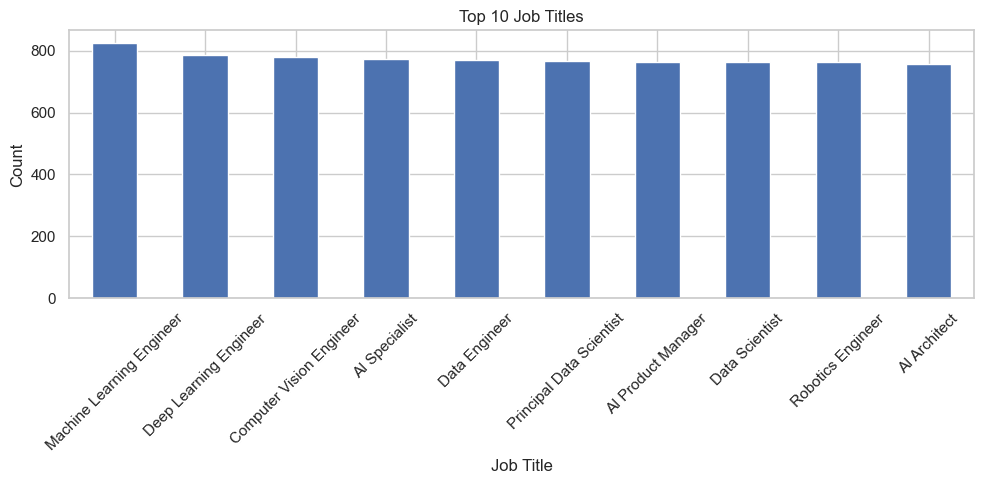

In [10]:
plt.figure(figsize=(10, 5))
df['job_title'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../images/top_10_job_titles.png', bbox_inches='tight')
plt.show()

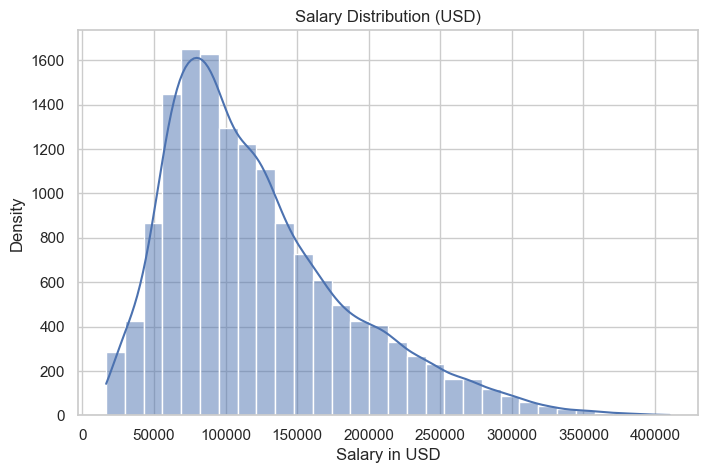

In [11]:
# 2. Salary Distribution (USD)
plt.figure(figsize=(8, 5))
sns.histplot(df['salary_usd'], kde=True, bins=30)
plt.title("Salary Distribution (USD)")
plt.xlabel("Salary in USD")
plt.ylabel("Density")
plt.savefig('../images/salary_distribution.png', bbox_inches='tight')
plt.show()

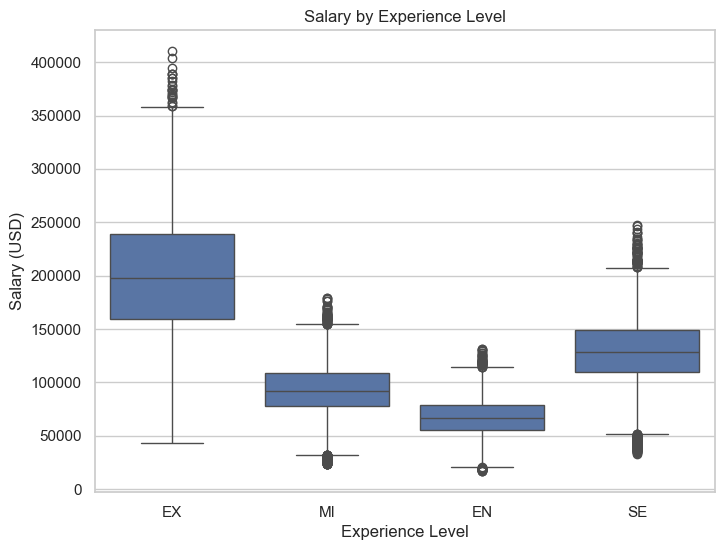

In [12]:
# 3. Salary by Experience Level
plt.figure(figsize=(8, 6))
sns.boxplot(x='experience_level', y='salary_usd', data=df)
plt.title("Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.savefig('../images/salary_by_experience.png', bbox_inches='tight')
plt.show()


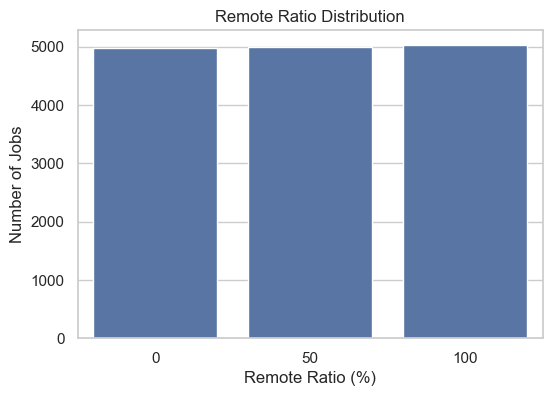

In [13]:
# 4. Remote Ratio Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='remote_ratio', data=df)
plt.title("Remote Ratio Distribution")
plt.xlabel("Remote Ratio (%)")
plt.ylabel("Number of Jobs")
plt.savefig('../images/remote_ratio_distribution.png', bbox_inches='tight')
plt.show()

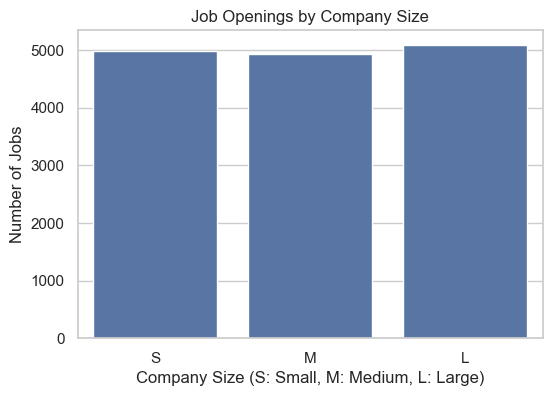

In [14]:
# 5. Job Openings by Company Size
plt.figure(figsize=(6, 4))
sns.countplot(x='company_size', data=df, order=['S', 'M', 'L'])
plt.title("Job Openings by Company Size")
plt.xlabel("Company Size (S: Small, M: Medium, L: Large)")
plt.ylabel("Number of Jobs")
plt.savefig('../images/job_openings_by_company_size.png', bbox_inches='tight')
plt.show()

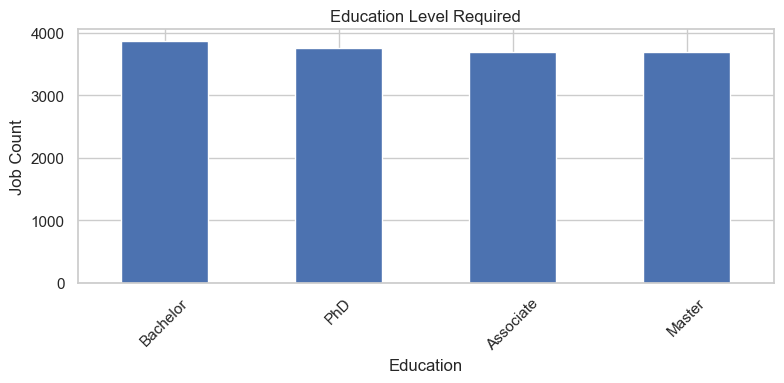

In [15]:
# 6. Education Level Required
plt.figure(figsize=(8, 4))
df['education_required'].value_counts().plot(kind='bar')
plt.title("Education Level Required")
plt.xlabel("Education")
plt.ylabel("Job Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../images/education_required.png', bbox_inches='tight')
plt.show()

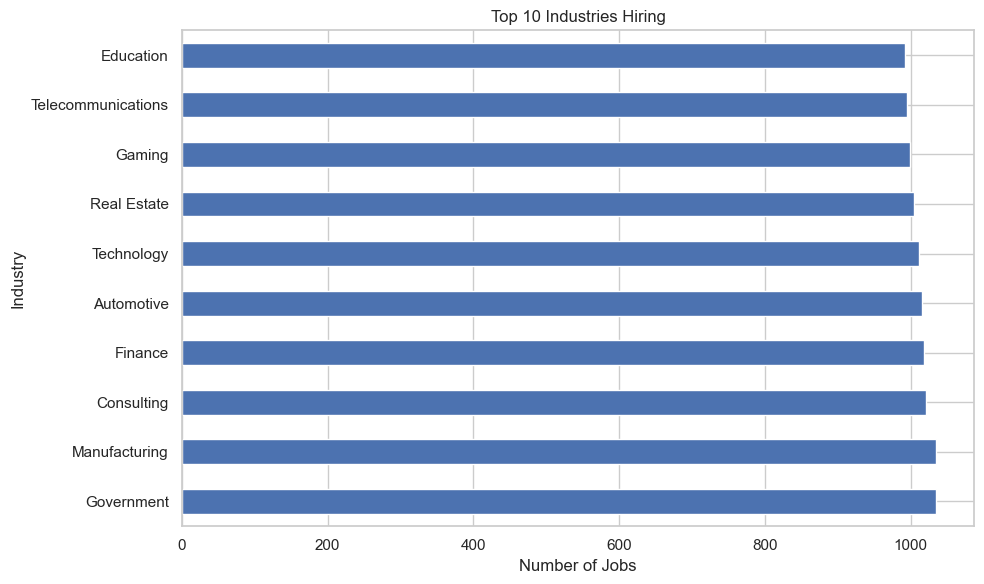

In [16]:
# 7. Top 10 Industries Hiring
plt.figure(figsize=(10, 6))
df['industry'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Industries Hiring")
plt.xlabel("Number of Jobs")
plt.ylabel("Industry")
plt.tight_layout()
plt.savefig('../images/top_10_industries.png', bbox_inches='tight')
plt.show()

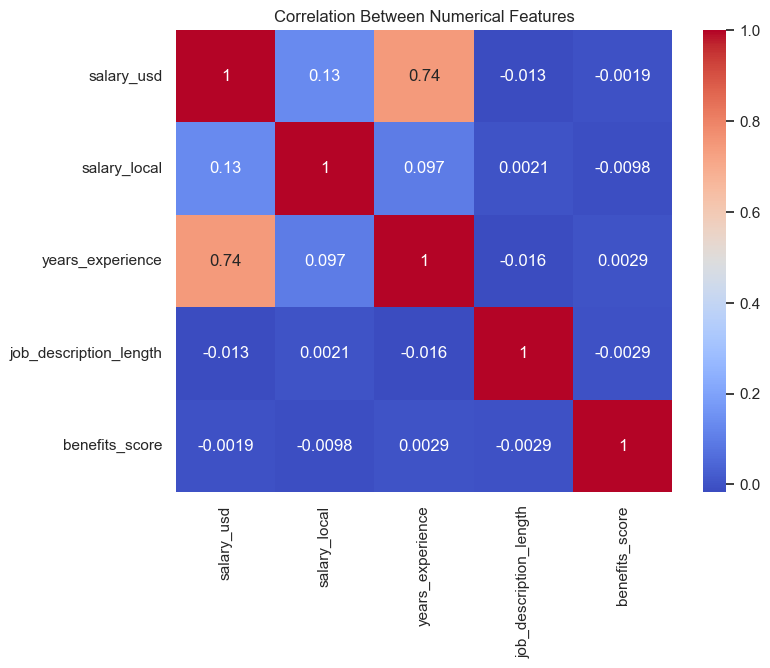

In [17]:
# 8. Correlation Heatmap
numerical_cols = ['salary_usd', 'salary_local', 'years_experience', 'job_description_length', 'benefits_score']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numerical Features")
plt.savefig('../images/correlation_heatmap.png', bbox_inches='tight')
plt.show()

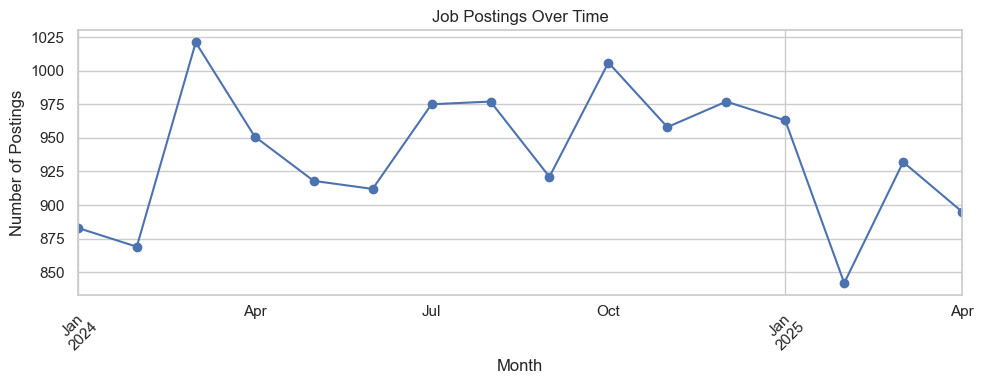

In [18]:
# 9. Job Postings Over Time
df['posting_date'] = pd.to_datetime(df['posting_date'])
monthly_postings = df['posting_date'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(10, 4))
monthly_postings.plot(kind='line', marker='o')
plt.title("Job Postings Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Postings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../images/job_postings_trend.png', bbox_inches='tight')
plt.show()

In [19]:
# 10. Key Insights
print("Key Insights:")
print("- Most jobs are for Data Scientists and Machine Learning roles.")
print("- Senior roles have a wider salary range and higher averages.")
print("- Medium and Large companies are the major hirers.")
print("- Majority of jobs allow partial or full remote work.")
print("- Tech and Finance are among the most hiring industries.")

Key Insights:
- Most jobs are for Data Scientists and Machine Learning roles.
- Senior roles have a wider salary range and higher averages.
- Medium and Large companies are the major hirers.
- Majority of jobs allow partial or full remote work.
- Tech and Finance are among the most hiring industries.
